__собираем статистики по объявлениям о продаже земли__

_Evgeny S. Borisov <parser@mechanoid.su>_

In [1]:
!date

Вт 09 июл 2024 11:17:07 MSK


# загружаем данные

In [2]:
import pandas as pd
import geopandas as gpd

pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
df = pd.read_pickle('data/2024/df_land.pkl')
df['dt'] = df['ts'].dt.date
display( len(df) )
cols = ['title','address','latitude','longitude','priceM','dt']
display( df.sample(3)[cols] )

34576

title  \
14806   участок 6 сот. (ижс)   
16531  участок 10 сот. (ижс)   
2255    участок, 4 сот., ижс   

                                                     address  latitude  \
14806                             севастополь,славянская ул.     44.56   
16531              севастополь,с.фронтовое,сары-синапная ул.     44.67   
2255   севастополь,р-н нахимовский,мкр.кача,качинский район      44.62   

       longitude  priceM          dt  
14806      33.45    7.40  2024-06-17  
16531      33.75    2.75  2024-06-10  
2255       33.53    2.50  2024-06-07

---

In [4]:
# df_ = pd.read_pickle('data/2023/data_land.pkl').rename(columns={'adr':'address'})
# df_['dt'] = df_['ts'].dt.date
# display( len(df_) )
# display( df_.sample(3)[cols] )

In [5]:
# df_ = (
#         df_
#         .dropna(subset=['dt','url'])
#         .drop_duplicates(['dt','url'])
#         .drop(columns=['adr_orig','obj_name','avito_page'])
#     )
# display( len(df_) )
# cols = ['title','address','latitude','longitude','priceM','dt','url']
# display( df_.sample(3)[cols] )

In [6]:
# df_['dt'].drop_duplicates()

In [7]:
# # history_date = df_['dt'].max()
# history_date = pd.to_datetime('2023-01-10').date()
# display(history_date)

In [8]:
# df = pd.concat([df,df_]).reset_index(drop=True)
# display( len(df) )
# del df_

---

In [9]:
df['month'] = df['ts'].dt.to_period('M')
df['week'] = df['ts'].dt.to_period('W')

In [10]:
display( len(df) )
df = df.query('priceM>1e-3').reset_index(drop=True)
display( len(df) )

34576

34523

In [11]:
import numpy as np
df['log_priceM'] = df['priceM'].apply(lambda x: np.log(x+1.))
df['log_priceMU'] = df['priceMU'].apply(lambda x: np.log(x+1.))

In [12]:
# df[['area','priceM','priceMU']]

---

In [13]:
# df['dt'].drop_duplicates().sort_values()

In [14]:
# display( len(df) )
# df = df[ df['dt']!=pd.to_datetime('2024-06-04').date() ]
# display( len(df) )
# df = df[ df['dt']!=pd.to_datetime('2024-06-05').date() ]
# display( len(df) )
# df = df.reset_index(drop=True)

---

In [15]:
# df['latitude'] = pd.to_numeric( df['latitude'], errors='coerce' )
# df['longitude'] = pd.to_numeric( df['longitude'], errors='coerce' )

In [16]:
# df.info()

In [17]:
# #           46.319437, 33.911048
# #
# # 45.402617, 32.455625 |  45.545301, 36.684702
# #
# #          44.320887, 33.917013

# display( len(df) )
# df = df.query('(32.4<longitude<36.7) & (44.3<latitude<46.4)') 
# display( len(df) )

In [18]:
# df.loc[ df['address']=='квартал Старый Город', 'place'] = 'turkie'
# df.loc[ df['address'].str.lower().str.match('анталья'), 'place' ] = 'turkie' 

# df.loc[ df['address'].str.lower().str.match(r'.*бахчисарай.*'), 'place' ] = 'bahchisaray'
# df.loc[ df['address'].str.lower().str.match(r'.*севастополь,.*'), 'place' ] = 'sevastopol'

# df.loc[ df['address'].str.lower().str.match(r'.*мысовское.*'), 'place' ] = 'kerch'
# df.loc[ df['address'].str.lower().str.match(r'.*алушта.*'), 'place' ] = 'alushta'
# df.loc[ df['address'].str.lower().str.match(r'.*гурзуф.*'), 'place' ] = 'gurzuf'

# df.loc[ df['address'].str.lower().str.match(r'.*с.лучистое.*'), 'place' ] = 'alushta'
# df.loc[ df['address'].str.lower().str.match(r'.*снт солнечная долина.*'), 'place' ] = 'sudak'
# df.loc[ df['address'].str.lower().str.match(r'.*пгт.новоозёрное.*'), 'place' ] = 'evpatoria'

# df.loc[ df['address'].str.lower().str.match(r'.*с.мирное.*'), 'place' ] = 'simferopol'
# df.loc[ df['address'].str.lower().str.match(r'.*тсн аэрофлот.*'), 'place' ] = 'simferopol'

# df.loc[ df['address'].str.lower().str.match(r'.*семисот.*'), 'place' ] = 'kerch'

In [19]:
# df.loc[ df['url']=='https://avito.ru/2322251740', ['latitude','longitude']] = None
# df.loc[ df['address']=='Севастополь,Чёрное море', ['latitude','longitude'] ] = None
# df.loc[ df['address'].str.lower().str.match('чёрное море'), ['latitude','longitude'] ] = None 

# df.loc[ df['longitude']<30., ['latitude','longitude'] ] = None 

In [20]:
# display( len(df) )
# df = df.dropna(subset=['latitude','longitude'])
# display( len(df) )

In [21]:
# print(len(df))
# # выкидываем "ущербные" варианты 
# df = df.query('is_IJS')
# print(len(df))

In [22]:
gdf = gpd.GeoDataFrame( df, geometry = gpd.points_from_xy( df['longitude'], df['latitude']), crs='epsg:4326', )
# [['title','address','latitude','longitude','priceM']] 
display( gdf.sample(3)[cols])

title  \
32960  участок 4,7 сот. (снт, днп)   
22828         участок 9 сот. (ижс)   
16928         участок 8 сот. (ижс)   

                                                 address  latitude  longitude  \
32960  севастополь,садоводческое товарищество парус-2,87     44.55      33.46   
22828                  бахчисарай,с.речное,цветочная ул.     44.74      33.78   
16928                              севастополь,с.полюшко     44.73      33.58   

       priceM          dt  
32960    2.90  2024-06-07  
22828    1.65  2024-06-17  
16928    3.20  2024-06-10

In [23]:
display( len(df) )
gdf = gdf.query('place in ("bahchisaray","sudak","sevastopol")').reset_index(drop=True)
display( len(df) )

34523

34523

---

In [24]:
dt_max = df['dt'].max()
dt_min = df['dt'].min()
# display( dt_min,history_date,dt_max )
display( dt_min,dt_max )

datetime.date(2024, 6, 7)

datetime.date(2024, 7, 8)

In [25]:
# gdf_history = gdf.query(f'dt <= @history_date')
# gdf = gdf.query(f'dt > @history_date')

In [26]:
# display( len(gdf_history) )
display( len(gdf) )

34392

In [27]:
# cols = ['title','address','latitude','longitude','priceM','dt','place','url']
# gdf[ (gdf['place']=='sevastopol') & (gdf['address'].str.match(r'.*Судак.*')) ][cols]

In [28]:
# gdf['place'].unique()

# общая статистика

In [29]:
gdf[['title','address','priceM','geometry']].sample(512).explore()

In [30]:
gdf.query('place=="sevastopol"')[['title','address','priceM','geometry']].sample(512).explore()

In [31]:
( 
    gdf.query('place=="sudak"')
    [['title','address','priceM','area_size_category','geometry']]
    #.explore('area_size_category', legend=True) 
    .explore()    
)

In [32]:
(
    gdf.query('place=="bahchisaray"')
    [['title','address','priceM','area_size_category','geometry']]
    #.sample(100)
    .explore() #'area_size_category', legend=True) 
)

In [33]:
# (
# gdf.loc[ gdf['address'].str.lower().str.match(r'.*с.лучистое.*') ]
# [['title','place','address','priceM','area_size_category','geometry']]
# .explore() 
# )

# df.loc[ df['address'].str.lower().str.match(r'.*с.лучистое.*'), 'place' ] = 'alushta'
# df.loc[ df['address'].str.lower().str.match(r'.*снт солнечная долина.*'), 'place' ] = 'sudak'
# df.loc[ df['address'].str.lower().str.match(r'.*пгт.новоозёрное.*'), 'place' ] = 'evpatoria'

In [34]:
gdf.loc[ gdf['priceMU']==np.inf, 'priceMU'] = None
gdf['priceMU'] = gdf['priceMU'].fillna( gdf['priceMU'].max()+1. )

In [35]:
percentiles=[.01,.05,.1,.25,.5,.75,.9,.95]
stat = (
    gdf
    .groupby(['place','week'],observed=True)
    # .groupby(['place','month'],observed=True)
    ['priceMU'].describe(percentiles=percentiles)
)

display( stat )

count  mean  std  min   1%   5%  10%  \
place       week                                                            
bahchisaray 2024-06-03/2024-06-09   625.00  0.15 0.27 0.00 0.00 0.00 0.00   
            2024-06-10/2024-06-16  2210.00  0.15 0.28 0.00 0.00 0.00 0.00   
            2024-06-17/2024-06-23  1316.00  0.15 0.27 0.00 0.00 0.00 0.01   
            2024-06-24/2024-06-30   602.00  0.14 0.27 0.00 0.00 0.00 0.01   
            2024-07-08/2024-07-14   615.00  0.14 0.20 0.00 0.00 0.00 0.00   
sevastopol  2024-06-03/2024-06-09  2674.00  0.73 1.20 0.00 0.01 0.05 0.12   
            2024-06-10/2024-06-16 10537.00  0.76 1.27 0.00 0.01 0.06 0.15   
            2024-06-17/2024-06-23  7463.00  0.76 1.38 0.00 0.01 0.05 0.13   
            2024-06-24/2024-06-30  2932.00  0.78 1.42 0.00 0.02 0.06 0.15   
            2024-07-08/2024-07-14  2039.00  0.82 1.53 0.00 0.02 0.10 0.18   
sudak       2024-06-03/2024-06-09   330.00  0.62 0.70 0.00 0.02 0.07 0.13   
            2024-06-10/2024-06-16  1356.00  0.61 0.65 0.00 0.01 0.07 0.13   
            2024-06-17/2024-06-23   746.00  0.65 0.90 0.00 0.02 0.07 0.12   
            2024-06-24/2024-06-30   345.00  0.61 0.64 0.00 0.03 0.08 0.13   
            2024-07-08/2024-07-14   602.00  0.66 1.19 0.00 0.01 0.07 0.11   

                                   25%  50%  75%  90%  95%   max  
place       week                                                  
bahchisaray 2024-06-03/2024-06-09 0.01 0.05 0.20 0.39 0.56  4.67  
            2024-06-10/2024-06-16 0.01 0.05 0.20 0.37 0.57  4.67  
            2024-06-17/2024-06-23 0.01 0.05 0.21 0.37 0.56  4.67  
            2024-06-24/2024-06-30 0.01 0.05 0.21 0.35 0.50  4.67  
            2024-07-08/2024-07-14 0.01 0.05 0.21 0.35 0.51  1.74  
sevastopol  2024-06-03/2024-06-09 0.33 0.53 0.80 1.20 1.62 16.99  
            2024-06-10/2024-06-16 0.34 0.55 0.82 1.21 1.70 16.99  
            2024-06-17/2024-06-23 0.33 0.54 0.82 1.20 1.75 16.99  
            2024-06-24/2024-06-30 0.34 0.55 0.83 1.21 1.71 16.99  
            2024-07-08/2024-07-14 0.35 0.58 0.89 1.27 1.66 16.99  
sudak       2024-06-03/2024-06-09 0.26 0.44 0.75 1.11 1.71  5.13  
            2024-06-10/2024-06-16 0.26 0.43 0.72 1.08 1.70  5.13  
            2024-06-17/2024-06-23 0.25 0.44 0.78 1.24 1.80 16.99  
            2024-06-24/2024-06-30 0.25 0.43 0.75 1.21 1.69  5.13  
            2024-07-08/2024-07-14 0.25 0.43 0.71 1.17 1.70 16.99

In [36]:
import matplotlib.pyplot as plt

cols = ['1%','10%','25%','50%','75%']
# sizes = stat.reset_index()['area_size_category'].unique()
# sizes = [ '2-4', '4-8', '8-20']
# display( sizes )

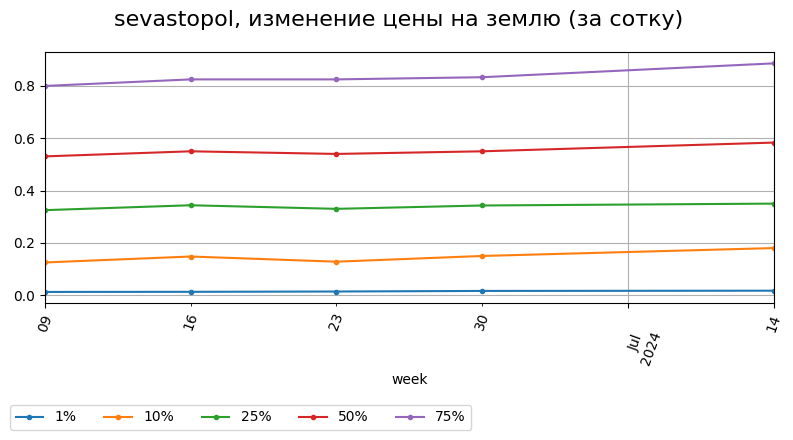

In [37]:
place = 'sevastopol'

fig, ax = plt.subplots(figsize=(8,4) )
stat.loc[(place,),cols].plot( grid=True,ax=ax,legend=False, rot=70, style='.-' )   

fig.suptitle(f'{place}, изменение цены на землю (за сотку)', fontsize=16)
fig.legend( labels=cols,frameon=True, ncol=len(cols), bbox_to_anchor=(0.6, 0.01))    
fig.tight_layout()

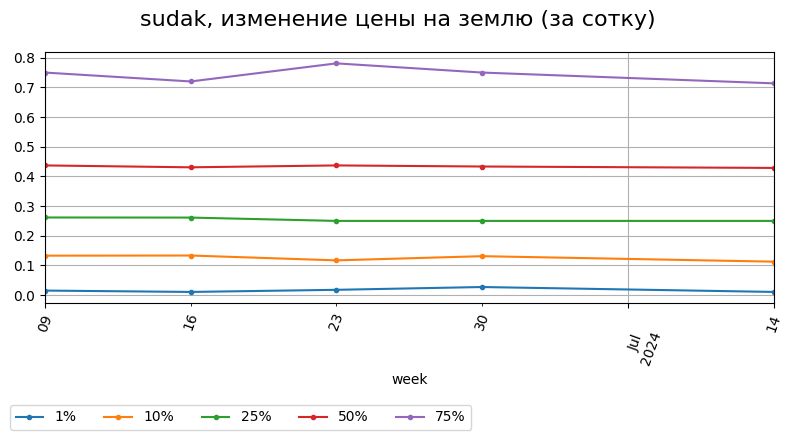

In [38]:
place = 'sudak'

fig, ax = plt.subplots(figsize=(8,4) )
stat.loc[(place,),cols].plot( grid=True,ax=ax,legend=False, rot=70, style='.-' )   

fig.suptitle(f'{place}, изменение цены на землю (за сотку)', fontsize=16)
fig.legend( labels=cols,frameon=True, ncol=len(cols), bbox_to_anchor=(0.6, 0.01))    
fig.tight_layout()

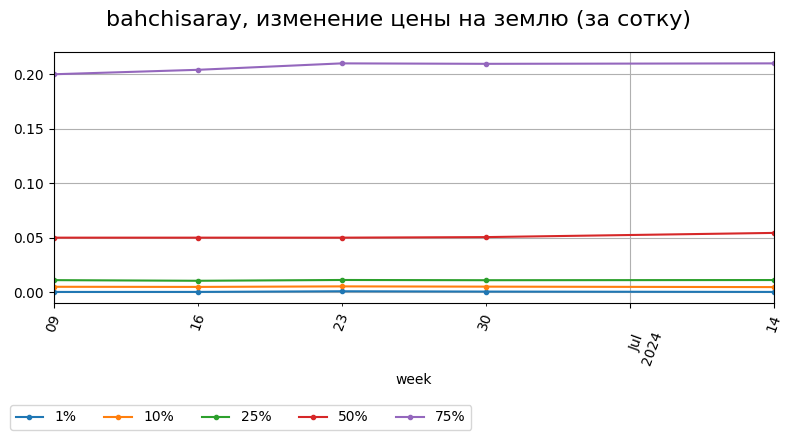

In [39]:
place = 'bahchisaray'

fig, ax = plt.subplots(figsize=(8,4) )
stat.loc[(place,),cols].plot( grid=True,ax=ax,legend=False, rot=70, style='.-' )   

fig.suptitle(f'{place}, изменение цены на землю (за сотку)', fontsize=16)
fig.legend( labels=cols,frameon=True, ncol=len(cols), bbox_to_anchor=(0.6, 0.01))    
fig.tight_layout()

# актуальная цена

In [40]:
display(len(gdf))
gdf_last = gdf[ gdf['dt'] == gdf['dt'].max() ]
display(len(gdf_last))

34392

3256

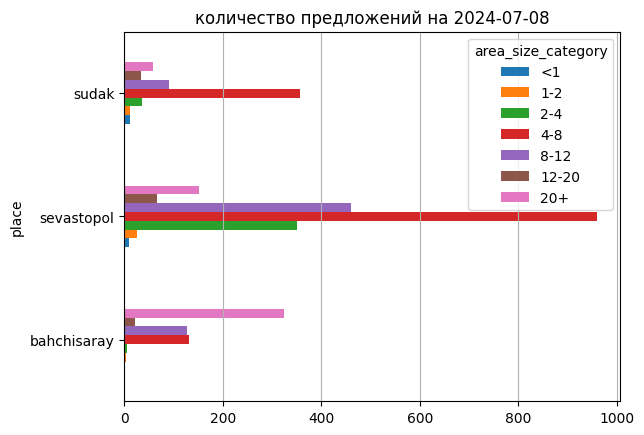

In [41]:
(
gdf_last
.groupby(['area_size_category','place'],observed=True)['url'].count().reset_index()
.pivot(index='place', columns='area_size_category', values='url')
.plot.barh(title='количество предложений на '+ str( gdf['dt'].max() ))
.grid(axis='x')    
)

In [42]:
(
    gdf_last
    .groupby(['place'],observed=False)
    ['priceMU'].describe(percentiles=percentiles)
)

count  mean  std  min   1%   5%  10%  25%  50%  75%  90%  95%  \
place                                                                         
bahchisaray  615.00  0.14 0.20 0.00 0.00 0.00 0.00 0.01 0.05 0.21 0.35 0.51   
sevastopol  2039.00  0.82 1.53 0.00 0.02 0.10 0.18 0.35 0.58 0.89 1.27 1.66   
sudak        602.00  0.66 1.19 0.00 0.01 0.07 0.11 0.25 0.43 0.71 1.17 1.70   

              max  
place              
bahchisaray  1.74  
sevastopol  16.99  
sudak       16.99

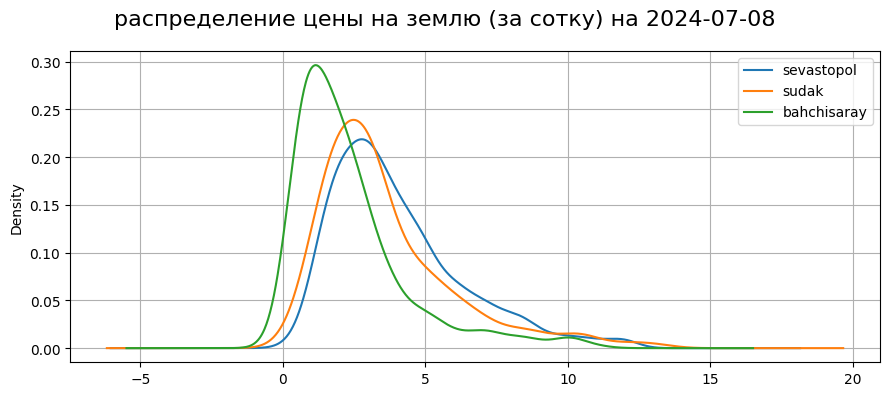

In [43]:
q_95 = gdf_last.groupby(['place'])['priceM'].quantile(.95)

places = ['sevastopol','sudak','bahchisaray']

fig, ax = plt.subplots(figsize=(9,4))
for i,p in enumerate(places): 
    (
        gdf_last.query(f'(place=="{p}")&(priceM<{q_95[p]})')
           ['priceM'].plot.kde( legend=True, ax=ax, grid=True, label=p )
    )
fig.suptitle(f'распределение цены на землю (за сотку) на '+ str( gdf_last['dt'].max() ), fontsize=16)
fig.tight_layout()

# цены на карте

In [ ]:
import h3
from shapely.geometry import Polygon
from shapely.geometry import MultiPoint

In [ ]:
def cover_grid_hexagonal(gmtr,cell_size=6,crs='EPSG:4326'):
    polygonise = lambda hex_id: Polygon( h3.h3_to_geo_boundary( hex_id, geo_json=True)  )
    hexs = list(h3.polyfill( gmtr.__geo_interface__, cell_size, geo_json_conformant = True ))
    return gpd.GeoDataFrame({ 'hex_id': hexs,  'geometry': list(map(polygonise, hexs)), },crs=crs,)

In [ ]:
# cols = ['title','address','latitude','longitude','priceM','dt','url']
# gdf_last.query('place=="sevastopol"')[cols]

In [ ]:
# gdf_last[gdf_last['place']=='sevastopol'][cols]

## Севастополь

In [ ]:
frame_sevastopol = gpd.GeoDataFrame([{ # все предложения
            'place':'sevastopol', 
            'geometry':MultiPoint( gdf_last.query('place=="sevastopol"')['geometry'].tolist() ).convex_hull, 
        }],crs='EPSG:4326')

frame_sevastopol.explore()

In [ ]:
# gdf_last.query('place=="sevastopol"')[['priceM']].describe([.9,.95,.99]).T

In [ ]:
grid = cover_grid_hexagonal( frame_sevastopol.geometry.values[0],cell_size=7 )
grid_values = ( 
    grid
    # .sjoin( gdf_last.query('(place=="sevastopol")&(priceM<10.0)'), how='inner',)
    .sjoin( gdf_last.query('place=="sevastopol"'), how='inner',)
    .groupby(['hex_id'])
    [['log_priceMU','priceMU']]
    .median()
    .reset_index()
)

(
    grid
    .merge(grid_values,on='hex_id')
    [['priceMU','geometry','log_priceMU',]]
    .explore(column='log_priceMU',cmap='rainbow')
)

## Судак

In [ ]:
frame_sudak = gpd.GeoDataFrame([{ # все предложения
            'place':'sudak', 
            'geometry':MultiPoint( gdf_last.query('place=="sudak"')['geometry'].tolist() ).convex_hull, 
        }],crs='EPSG:4326')

In [ ]:
# gdf_last.query('place=="sudak"')[['priceM']].describe([.9,.95,.99]).T

In [ ]:
grid = cover_grid_hexagonal( frame_sudak.geometry.values[0],cell_size=8 )
grid_values = ( 
    grid
    .sjoin( gdf_last.query('place=="sudak"'), how='inner',)
    .groupby(['hex_id'])
   [['log_priceMU','priceMU']]
    .median()
    .reset_index()
)

(
    grid
    .merge(grid_values,on='hex_id')
    [['priceMU','geometry','log_priceMU',]]
    .explore(column='log_priceMU',cmap='rainbow')
)

# районы Севастополя

In [ ]:
# загружаем области поиска
frames_path = 'data/frames/'
frames_index = pd.read_csv(f'{frames_path}/_index.tsv',sep='\t')

swap_coo = lambda coo : [ (c[1],c[0]) for c in coo ]
df2poly = lambda df : Polygon(swap_coo(df.values))

frames = gpd.GeoDataFrame([ 
        { 'area_name':nm, 'geometry': df2poly( pd.read_csv(f'{frames_path}/{f}',header=None) ) } 
        for nm,f in frames_index.values
    ],crs='epsg:4326',)

In [ ]:
display(frames)

In [ ]:
frames.explore('area_name', legend=True)

In [ ]:
area_name=[
    #'Севастополь, парк 60-летия СССР',
    #'Севастополь, Хрусталёва/Хрюкина',
    #'Севастополь, район Острякова',
    #'Севастополь, Малахов курган',
    'Севастополь, кр.горка (старый)',
    'Севастополь, кр.горка (новый)',
    'Севастополь, Благополучный',
    ]

In [ ]:
# выбираем область
frame_ = frames[frames['area_name'].isin(area_name)]

# фильтруем данные по области
gdf_last_local = gdf_last.sjoin( frame_, how='inner', predicate='within') 
gdf_last_local[['title','priceM','address','geometry']].explore( legend=False)

In [ ]:
(
    gdf_last_local
    .groupby(['area_size_category'], observed=True)['url'].count()
    .plot.barh(title='количество предложений на '+ str( gdf['dt'].max()) + '\n' + ' / '.join(area_name) )
    .grid(axis='x')    
)

In [ ]:
q_95 = gdf_last_local['priceM'].quantile(.95)

fig, ax = plt.subplots(figsize=(7,3) )
(
    gdf_last_local
    .query(f'(priceM<{q_95})')
    ['priceMU'].plot.kde(legend=True,ax=ax,title='/'.join(area_name), grid=True)   
)
fig.suptitle(f'распределение цены на землю (за сотку) на '+ str( gdf_last_local['dt'].max() ), fontsize=16)
fig.tight_layout()

----

In [ ]:
# изменение цены по району
gdf_local = gdf.sjoin( frame_, how='inner', predicate='within') 

In [ ]:
percentiles=[.01,.05,.1,.25,.5,.75,.9]
stat = (
    gdf_local
    .groupby(['week'],observed=True)
    ['priceMU'].describe(percentiles=percentiles)
)
display( stat )

In [ ]:
fig, ax = plt.subplots(figsize=(10,5) )
stat[cols].plot( grid=True,ax=ax,legend=False, rot=70, style='.-' )
fig.suptitle(f'изменение цены (за сотку) на землю\n {'/'.join(area_name)}', fontsize=16)
fig.legend( labels=cols,frameon=True, ncol=len(cols), bbox_to_anchor=(0.6, 0.01))
fig.tight_layout()